In [88]:
import pandas as pd
import numpy as np
import scipy
import statistics
from scipy import signal, fftpack
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

df1 = pd.read_csv(r'real.csv')
df2 = pd.read_csv(r'sim.csv')


In [81]:
invertreal=widgets.Checkbox(
    value=False,
    description='Invert Real Data',
    disabled=False,
    indent=False
)
invertsim=widgets.Checkbox(
    value=False,
    description='Invert Simulated Data',
    disabled=False,
    indent=False
)


display_button=widgets.ToggleButton(
    value=False,
    description='Redisplay graph',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
)


ToggleButton(value=True, description='Redisplay graph', tooltip='Description')

Checkbox(value=True, description='Invert Simulated Data', indent=False)

Checkbox(value=False, description='Invert Real Data', indent=False)

Invert sim


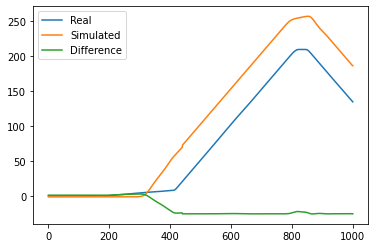

<Figure size 432x288 with 0 Axes>

In [86]:
display(display_button)
display(invertsim)
display(invertreal)
temp1 = df1.y
temp2 = df2.y

if display_button:
    if invertsim.value:
        print("Invert sim")
        tempy2 = -df2.y
    else: tempy2 = df2.y
    if invertreal.value:
        print("Invert real")
        tempy1 = -df1.y
    else: tempy1 = df1.y
    if (not invertsim) and (not invertreal):
        print("No change")
        tempy1 = df1.y
        tempy2 = df2.y
    if (statistics.mean(tempy1) < 0) and (statistics.mean(tempy2) > 0) : df3.y = (tempy1+tempy2)/2
    if (statistics.mean(tempy1) < 0) and (statistics.mean(tempy2) < 0) : df3.y = (tempy1-tempy2)/2
    if (statistics.mean(tempy1) > 0) and (statistics.mean(tempy2) < 0) : df3.y = (tempy1+tempy2)/2
    if (statistics.mean(tempy1) > 0) and (statistics.mean(tempy2) > 0) : df3.y = (tempy1-tempy2)/2

    realline = plt.plot(df1.x, tempy1, label = 'Real')
    simline = plt.plot(df2.x, tempy2, label='Simulated')
    diffline = plt.plot(df3.x, df3.y, label='Difference')
    plt.legend()
    plt.figure()
    fig = plt.gcf()

In [46]:
def graph():
    out = widgets.Output(layout={'border': '1px solid black'})
    with out:
        global tempy1,tempy2    
        if invertsim.value:
            print("Invert sim")
            tempy2 = -df2.y
        elif invertreal.value:
            print("Invert real")
            tempy1 = -df1.y
        else:
            print("No change")
            tempy1 = df1.y
            tempy2 = df2.y
        realline = plt.plot(df1.x, tempy1, label = 'Real')
        simline = plt.plot(df2.x, tempy2, label='Simulated')
        diffline = plt.plot(df3.x, df3.y, label='Difference')
        plt.legend()
        plt.figure()



from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    graph()

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

-1


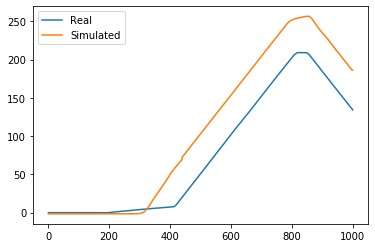

In [58]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df2.y)
print (shft01)
plt.figure()
realline = plt.plot(df1.x, df1.y, label = 'Real')
simline = plt.plot(df2.x.shift(-shft01), -df2.y, label='Simulated')
plt.legend()
fig = plt.gcf()

In [16]:
xcor = np.correlate(df1.y, -df2.y, "full")
print (xcor)
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here
print (nR)
print(maxLag)

[  -7.73062897  -15.6687416   -23.84531738 ... -666.98794262 -443.83174901
 -221.5023396 ]
16088355.91727781
999


No handles with labels found to put in legend.


688.0
673.0


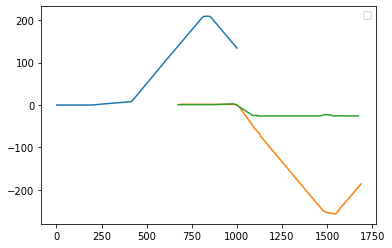

In [17]:
plt.plot(df1.x, df1.y)
for target in [df2, df3]:
    dx = np.mean(np.diff(df1.x.values))
    shift = (np.argmax(signal.correlate(df1.y, target.y)) - (len(target.y)-1)) * dx
    print(shift)
    plt.plot(target.x + shift, target.y)
plt.legend()

-1


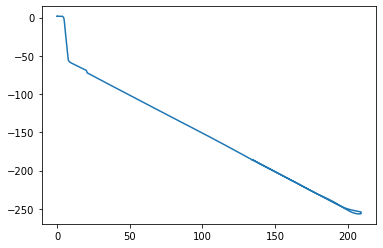

In [18]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df1.y)
print (shft01)
plt.figure()
plt.plot(df1.y, df2.y)
fig = plt.gcf()

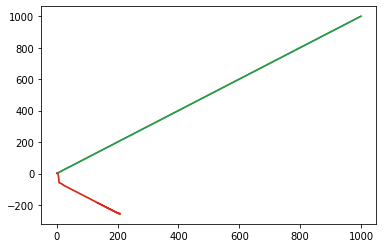

In [19]:
plt.figure()
plt.plot(df1, df2,
         df1.shift(-shft01), df2)
fig = plt.gcf()

Now we're going to try using a FFT comparison

In [20]:
a = np.array(df1.y)
b = np.array(-df2.y)
orrfirst = signal.correlate(a,b)
corrsecond = signal.correlate(b,a)
xcor = np.correlate(a, b, "full")
nR = max(corrfirst)
maxLag = np.argmax(corrfirst)  # I imported numpy as np here
print("nR", nR, "Lag", maxLag)
plt.figure()
plt.plot(df1.x, df1.y,
         df2.x.shift(maxLag), -df2.y, df2.x, -df2.y)
fig = plt.gcf()

NameError: name 'corrfirst' is not defined

In [21]:
A = fftpack.fft(a)
B = fftpack.fft(b)
Ar = -A.conjugate()
Br = -B.conjugate()
first = np.argmax(np.abs(fftpack.ifft(Ar*B)))
second = np.argmax(np.abs(fftpack.ifft(A*Br)))
print (first)
print (second)

0
0


Now we'll do it without the FFT

In [22]:
a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])
corrfirst = signal.correlate(a,b)
corrsecond = signal.correlate(b,a)
xcor = np.correlate(a, b, "full")
nR = max(corrfirst)
maxLag = np.argmax(corrfirst)  # I imported numpy as np here
print("nR", nR, "Lag", maxLag)

first = np.argmax(signal.correlate(a,b))
second = np.argmax(signal.correlate(b,a))
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here

# testing rotation
a = pd.DataFrame(a)
b = pd.DataFrame(b)
b1 = b[0:5]
print("b1=", b1)
b2 = b[5:]
print("b2=", b2)
b3 = b2.append(b1)
print("append", b3)
b3.reset_index(drop=True, inplace = True)
print ("b2 Rotated")
print(b3)

nR 88 Lag 16
b1=    0
0  0
1  0
2  0
3  0
4  0
b2=     0
5   1
6   2
7   3
8   4
9   3
10  2
11  1
12  0
13  1
14  2
15  3
16  4
17  3
18  2
19  1
20  0
append     0
5   1
6   2
7   3
8   4
9   3
10  2
11  1
12  0
13  1
14  2
15  3
16  4
17  3
18  2
19  1
20  0
0   0
1   0
2   0
3   0
4   0
b2 Rotated
    0
0   1
1   2
2   3
3   4
4   3
5   2
6   1
7   0
8   1
9   2
10  3
11  4
12  3
13  2
14  1
15  0
16  0
17  0
18  0
19  0
20  0


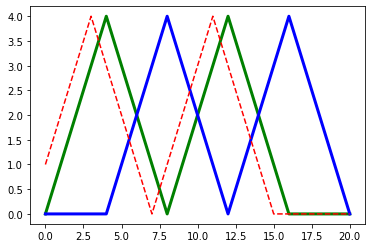

In [23]:
plt.figure()
plt.plot(a, linewidth=3, color = "green")
plt.plot(b, linewidth=3, color = "blue")
plt.plot(b3, linestyle='dashed', color = "red")
#plt.plot(a.shift(maxLag))

In [24]:
fig = plt.gcf()
print(first)
print(second)
df1 = pd.read_csv(r'real2.csv')
df2 = pd.read_csv(r'sim2.csv')
a = np.array(df1)
b = np.array(-df2)
first = np.argmax(signal.correlate(a,b))
second = np.argmax(signal.correlate(b,a))
print(first)
print(second)

16
24
31
45


<Figure size 432x288 with 0 Axes>

In [25]:
af = scipy.fft.fft(a)
bf = scipy.fft.fft(b)
c = scipy.fft.ifft(af * np.conj(bf))

time_shift = np.argmax(abs(c))
print(time_shift)

12


The following is an effort to code the Theil Inefficiency Coefficient (TIC) from scratch

In math terms, it looks like this for datapoints n:

TIC = sqrt((1/n * sum((real(n) - sim(n)))^2)/((1/n*sqrt(real(n)^2) + 1/n*sqrt(sim(n)^2))

In [120]:
real = np.array(df1)
sim = np.array(df2)


sum1 = 0
sum2 = 0
sum3 = 0

for n in np.nditer(real):
    sum1 = sum1 + (real[int(n-1)][1]-sim[int(n-1)][1])**2
    